# 시계열

> 독립변인(X)가 "시간" 또는 "연속"인 데이터
> 전제: 이전 데이터에 영향을 받는 연속된 데이터 또는 데이터에 관련이 없는 독립변인 데이터이지만 시간 순서대로 있거나

- 고대: "달, 온도, 강 수위, 수확량, 햇빛" => 시간에 영향을 받음
- 근현대: "교육, 의료, 기후, 마케팅" => 시간에 영향을 받음

## 목적: (t+1)을 알고 싶음
- "수학, 통계, 확률" => 무작위 프로세스 => 과거 데이터가 무작위로 나타난 것으로 생각하고 그 속에서 패턴을 찾아서 그 다음에 올 1개만 찾음

## 목적: (t+k)를 알고 싶음
- 대규모 데이터를 처리 => "무작위 프로세스" -> 고전 모델 => 랜덤 워크
- 대규모 데이터를 처리 -> 딥러닝 사용 -> 딥러닝 모델(RNN을 기반으로 한 모델) => 이전 데이터의 데이터에 영향을 받아?(Y: RNN 모델(영상 생성형 모델) / N: CNN 모델(순서가 없는 것으로 사진 분석))

## 시계열 예측

- 시계열 예측 = 시계열 모델을 만드는 것 => 입력 변인은 "시간" 1개임. 1:1 or 1:n => 시간 하나 넣고 n개 나오게 만들어야함.

## 시계열 특징
1. 주기를 가짐 => 주기성을 파괴하지 않으면 안 됨. => 그런데 이것을 없애면 특징이 다 날라가는데 어떡하나?
2. 제한된 범위(특정값) 내에서 변동함. => 얘도 삭제해야 함.

## 시계열 문제
- 예측
- 이상 탐지

# 무작위 행보
> 이론적 시계열 모델은 무작위성을 가진다고 가정합니다. 그러나, 컴퓨터는 그렇지 않습니다. (컴퓨터는 무작위성이 불가능함)

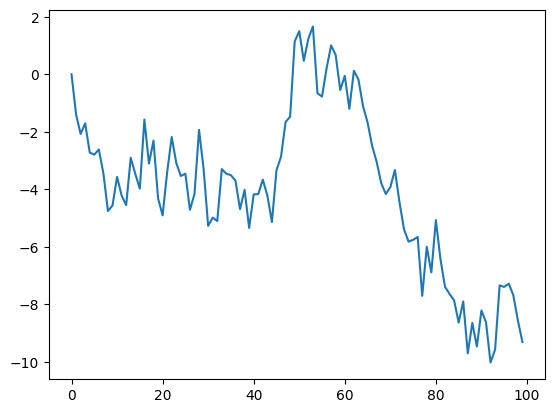

In [57]:
import matplotlib.pyplot as plt
import random

def generate_random_walk(length=100, mu=0, sig=1):
    ts=[]
    for i in range(length):
        e = random.gauss(mu, sig) # 첫번째 e값이 무엇이 되느냐에 따라서 성능차이가 많이 남.
        if i == 0:
            ts.append(0)
            
        else:
            ts.append(ts[i-1] + e) # 리스트의 이전 값에 랜덤 값에 e를 더함 // 시계열은 이전 데이터에 영향을 받는다.
    return ts
    
random.seed(0)
random_walk = generate_random_walk()
plt.plot(random_walk)
plt.show()

## 추세(Trend)

> 추세란? 전역에서의 시계열 방향을 뜻함 => 전 구간에서의 기울기 값(방향성)을 말함 -> 제한된 범위 내에서

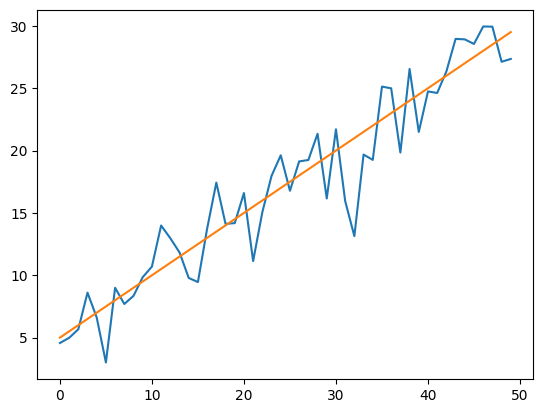

In [58]:
random.seed(42)
length = 50
A = 5
B = .5
C = 3

trend = [A + B * i for i in range(length)]
noise = [ C * random.gauss(0, 1) for i in range(length)]
ts = [trend[i] + noise[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

## 계절성

> 계절성은 ? 반복적인 변화 -> 추세와 계절성은 다름 -> 계절성은 주기성이 있는 데이터/ 특정 시기, 특정 시간이 되면 반복적으로 비슷한 데이터가 나오는 것.

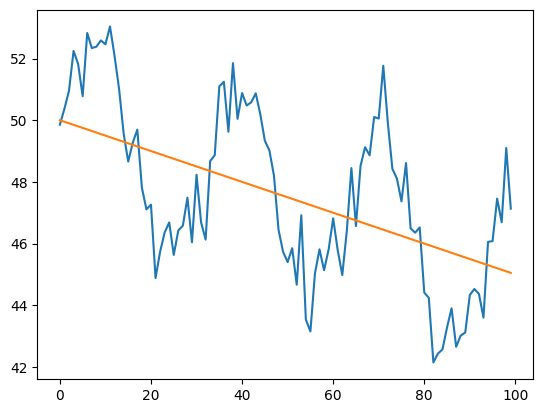

In [59]:
import math
random.seed(42)
length = 100
A = 50
B = -0.05
C = 1
S = 3

trend = [A + B * i for i in range(length)]
seasons = [S * math.sin(i/5) for i in range(length)]
noise = [ C * random.gauss(0, 1) for i in range(length)]
ts = [trend[i] + noise[i] + seasons[i] for i in range(length)]
plt.plot(ts)
plt.plot(trend)
plt.show()

## 시계열 데이터의 정상성

- 시계열 데이터가 정상적인가?
    - Y: 렌덤 워크
    - N: 추세, 계절성

In [60]:
# !pip install finance-datareader  # 시계열 데이터 셈플
# !pip install statsmodels # 통계분석 프로그램 R을 배낀 애, 통계쪽 라이브러리 모둠

# 자기 회귀 모델(AR) 
# 이전 관측값이 이후 데이터에 영향을 미친다에서 착안해 개발함.
# 정상성 데이터라고 가정함.

from statsmodels.tsa.ar_model import AutoReg
import FinanceDataReader as fdr

quotes  = fdr.DataReader("AAPL", "2011-01-01", "2024-12-31")
model = AutoReg(quotes["Close"], lags=2) # 뒤쪽 날짜 2일만 봄
model_fit = model.fit()
print(model_fit.params)

# AAPL(애플)의 다음날 주가 가격은? = > const(상수) + ((Close.L1-기울기) x 오늘 주가) + ((Close.L2 - 기울기)0.015291 + 애플의 어제 주가)

const       0.023316
Close.L1    0.985331
Close.L2    0.015291
dtype: float64


c:\TORCH-WORK\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


## ARIMA

- AR 모델의 고급형
- 관측값(y, 특정 시점의 실제 값)과 지연된 관측값에 적용된 '이동 평균 모델(MA)'의 잔차/오차 사이의 종속성을 포함하도록 구성됨
- 잔차와 오차를 재귀적으로 반영해서 사용
- 정상성 데이터에 계절성이 있는 것 같아요 => 계절성 날리던지 (ARIMA), 계절성 반영시키던지 (SARIMA)

In [61]:
from statsmodels.tsa.arima.model import ARIMA
import FinanceDataReader as fdr

from_data = "2015-1-1"
to_data = "2020-10-1"

quotes  = fdr.DataReader("AAPL", start = from_data, end=to_data)
closes = quotes["Close"].values

trian, test = closes[:-1], closes[-1]

model = ARIMA(trian, order=(5,2,3)) # 뒤쪽 날짜 2일만 봄
result = model.fit()
forecast = result.forecast()
predicted = forecast[0]


c:\TORCH-WORK\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\TORCH-WORK\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\TORCH-WORK\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


## 딥러닝을 활용해서 시계열 문제를 해결할 수 있어?
- 슬라이딩 윈도우 : (pd, 슬라이딩 윈도우, shift 함수)
- 전처리 / 후처리
    - 시계열 데이터의 전처리 중 가장 중요한 것 : n/a 처리 => fillna(df.mean()), interploate, bfill, ffill
    - 후처리 중 가장 중요한 것: 정규화, 추세 제거, 차분 

- model = ARIMA(train, order=(p, d, q))
- model = ARIMA(trian, order=(5,2,3)) 

- box-jenkins
    - p: AR차수 -> PACF  
    - d: 차분 -> 정상성이 아니라면 차분을 하는데, 그 횟수, p-value < 0.5
    - q: caf

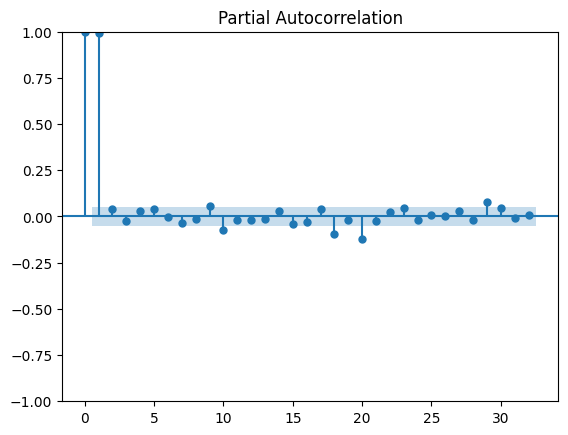

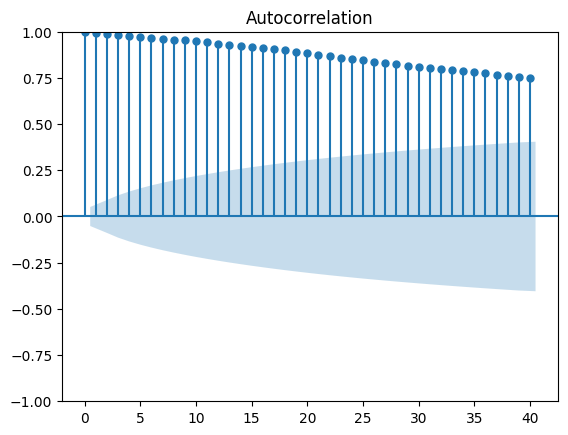

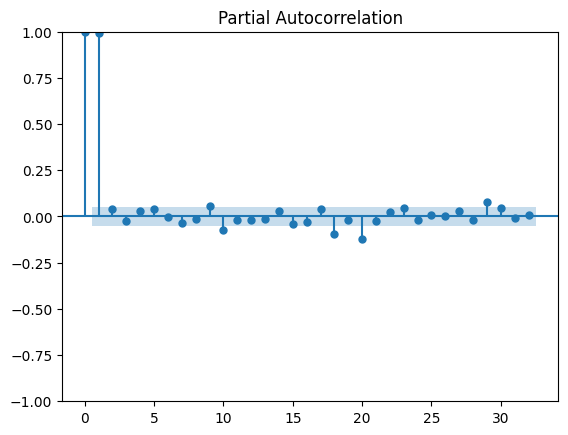

In [62]:

import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

result = adfuller(closes)
result[1] #p-value -> 차분을 어떻게 해야할까?

diff_closes = np.diff(closes, n=1)
result = adfuller(diff_closes)
result[1] > 0.05 # 될때까지 n값을 변경해야 함

# 차분을 n번해도 안됨 / 즉, 데이터가 정상적이지 않음 / 추세와 계절성이 있어야 함.

plot_acf(closes, lags=40)
plot_pacf(closes)

## 고전적 모델
- 장점
    - 인기 있고, 안정적임

- 단점
    - 단일 변수 시계열에서만 작동 / x값이 1개인 것에는 잘 작동, but 2이면? 안됨
    - [치명적 단점] 장기 예측이 안 됨

# RNN을 사용한 시계열 문제 해결

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn

from torch.utils.data import DataLoader, Dataset, random_split

from sklearn.preprocessing import MinMaxScaler

## 1. 데이터 불러 오기

In [64]:
df = pd.read_csv("data/SBUX.csv")
X = df["Date"] # 뮨자열
y = df["Close"] # 숫자

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [71]:
class SBUXDataset(Dataset):
    #데이터 셋을 만들어보아라
    
    def __init__(self, csv_file="data/SBUX.csv", seq_length=2, is_train=True):
        self.seq_length = seq_length
        self.is_train = is_train
        
        # 데이터 로드
        df = pd.read_csv(csv_file)
        data = df["Close"].values.reshape(-1, 1)
        
        #데이터 정규화 => 이 안에서 써라. csv파일 넣기만 하면 알아서 자동으로 되게
        self.scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = self.scaler.fit_transform(data)
        
        # 시퀀스 데이터 생성
        X, y = self._create_seq(scaled_data, seq_length)
        
        # 학습 및 테스트 데이터 분리/ 인덱스 계산
        train_size = int(len(X) *0.8)
        
        if self.is_train:
            self.X = torch.FloatTensor(X[:train_size])
            self.y = torch.FloatTensor(X[:train_size])
            self.datas = df["Date"].iloc[self.seq_length: train_size + self.seq_length] # 시퀀스 길이를 고려한 날짜
        else:
            self.X = torch.FloatTensor(X[train_size :])
            self.y = torch.FloatTensor(X[train_size :])
            self.datas = df["Date"].iloc[train_size + self.seq_length:]
    
    def _create_seq(self, data, seq_length):
        xs, ys = [], []
        for i in range(len(data)- seq_length):
            x = data[i :  i + seq_length]
            y = data[i+ seq_length]
            xs.append(x)
            ys.append(y)
        return np.array(xs), np.array(ys)
    
    def __len__(self):
        return len(self.X)
        
    def __getitem__(self, index):
        return self.X[index], self.y[index]

In [72]:
seq_length = 10
batch_size = 16

In [73]:
train_dataset = SBUXDataset(seq_length=seq_length, is_train=True)
test_dataset = SBUXDataset(seq_length=seq_length, is_train=False)
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [75]:
for i in train_loader:
    print(i[0].shape, i[1].shape)

# 16개의 배치 사이즈, 10개의 시퀀스 길이, 1개의 차원

torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([16, 10, 1]) torch.Size([16, 10, 1])
torch.Size([2, 10, 1]) torch.Size([2, 10, 1])


# 3. 학습

In [78]:
class RNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(RNNModel, self).__init__()
        self.hidden_size = hidden_size
        self.rnn_cell = nn.RNNCell(input_size, output_size)
        self.fc = nn.Linear(hidden_size, output_size)
        
    def forward(self, x):
        batch_size = x.size(0)
        h_t = torch.zeros(batch_size, self.hidden_size).to(x.device)

        for t in range(x.size(1)):
            h_t = self.rnn_cell(x[:, t, :], h_t)
            output = self.fc(h_t)
            return output

# 4. 평가

In [79]:
# RNN에서는 
n_feat = 2
hidden_dim = 10 

torch.manual_seed(19)
# 행렬 곱셈이 아니라, 아르마다 곱셈을 함
rnn_cell = nn.RNNCell(input_size=n_feat, hidden_size=hidden_dim)
rnn_state = rnn_cell.state_dict()
rnn_state

OrderedDict([('weight_ih',
              tensor([[ 0.2964, -0.1898],
                      [ 0.2403,  0.1026],
                      [-0.1795, -0.2408],
                      [-0.0875, -0.3057],
                      [ 0.2216,  0.2922],
                      [-0.1594, -0.1299],
                      [-0.2997, -0.2599],
                      [-0.0076, -0.2619],
                      [ 0.0518, -0.3120],
                      [ 0.1449, -0.0440]])),
             ('weight_hh',
              tensor([[-0.1414, -0.0963,  0.0323, -0.1450,  0.1033, -0.1555,  0.2678,  0.0252,
                       -0.2442, -0.0610],
                      [ 0.2611,  0.2838,  0.2781,  0.3048, -0.0837, -0.1751, -0.2696, -0.0199,
                       -0.1823,  0.2628],
                      [-0.0194,  0.0092, -0.1790, -0.1915, -0.3139, -0.0382,  0.0992, -0.2106,
                       -0.0004,  0.1323],
                      [ 0.0663, -0.0115,  0.1466, -0.2395, -0.2909, -0.2192, -0.0452, -0.0368,
                 